# MATH 300: Numerical Analysis I Recitation 4

## Importing Previously Used Functions

Recall that so far we have already coded up a Newton's method root solver, a bisection method root solver, and a fixed point iteration method solver. Say we don't want to define those again, but we would like to use them in this notebook. We can use the $\texttt{include()}$ command to do just this. The small caviot is that we have to make a julia file (as opposed to a jupyter notebook file like this one). I have already done this and called it $\texttt{ch2funcs.jl}$. In that file, I simply have all of the functions that I just talked about defined. If this is in the same folder as the notebook where you are calling it, then you could just run the command:

$$\texttt{include("ch2funcs.jl")}$$

and you can now use all of the functions defined in that file without rewriting them in the notebook. If the julia file is not in the same folder as the notebook, you have to include the path to the file. For me that would look like:

$$\texttt{include("/Users/hunterwages/Math 300 Recitations/ch2funcs.jl")}$$

So in a code block, this looks like:

In [1]:
using Plots
using LaTeXStrings
using Printf
using LinearAlgebra
include("ch2funcs.jl");

just to show that it actually included this info:

In [2]:
typeof(newton)

typeof(newton) (singleton type of function newton, subtype of Function)

## The Secant Method

Today we will first look at some problems from section 2.3 of the textbook on Secant Method. You'll recognize that secant method is very similar to Newton's method. Namely, all we do is descretize $f'(x_n)$ using a backwards finite difference approximation. Furthermore, recall that the _Newton's method_ iteration is as follows:
$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$
Now, recall that the derivative of a function is just the slope of the tangent line at that point, so we can approximate that with a "rise over run" type term:
$$ f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}} $$
and when we make this change, we obtain the _Secant Method_ iteration:  
$$ x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} $$
Here is a function that performs the Secant Method:

In [3]:
function secant(f::Function, p₀::Real, p₁::Real; abs_tol = 1e-5, max_iters = 100, verbose = true)
    converged = false
    n = 0
    
    # pᵢ is the oldest point, pⱼ is the most recent known point, and we are computing pₖ.
    pᵢ = p₀; pⱼ = p₁ 
    while !converged
        n += 1
        
        @assert f(pᵢ) != f(pⱼ) "The secant evaluated at the current points has slope zero!
                                Cannot proceed. Last point: $(pⱼ)"
        
        # Main step for algorithm
        pₖ = pⱼ - f(pⱼ)*(pⱼ - pᵢ)/(f(pⱼ) - f(pᵢ))
        
        # Status updates
        if verbose
            println("Old p values: ($(pᵢ), $(pⱼ)), New p values: ($(pⱼ), $(pₖ)), Iteration: $(n)")
        end
        
        # Check convergence
        if abs(pⱼ - pₖ) < abs_tol
            converged = true
            return pₖ
        end
        
        # Return if algorithm does not converge
        if n == max_iters
            println("Did not converge in $(max_iters) iterations! Returning last value of p.")
            return pₖ
        end
        
        # Update current values for pᵢ and pⱼ
        pᵢ = pⱼ; pⱼ = pₖ
    end
end

secant (generic function with 1 method)

## Example of Newton vs. Secant Method: Problem 2.3.1

Let $f(x) = x^{2} - 6$ and $p_{0} = 1$. Use Newton's method to find $p_{2}$.

## Solution:

Recall the iteration for Newton's method: $\newline \newline$
$$
x_{n + 1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}.
\newline
$$
To use this formula, we need to find $f'(x)$: $\newline \newline$
$$
f'(x) = 2x
\newline
$$
Now, we can use the iteration to find $p_{1}$: $\newline \newline$
$$
\begin{align*}
    p_{1} &= p_{0} - \frac{f(p_{0})}{f'(p_{0})} \\
    &= 1 - \frac{f(1)}{f'(1)} \\
    &= 1 - \frac{-5}{2} \\
    &= \frac{7}{2} \\
    &= 3.5.
\end{align*}
\newline
$$
We can then take $p_{1}$ and use it to find $p_{2}$: $\newline \newline$
$$
\begin{align*}
    p_{2} &= p_{1} - \frac{f(p_{1})}{f'(p_{1})} \\
    &= \frac{7}{2} - \frac{(7/2)^{2} - 6}{2(7/2)} \\
    &= \frac{7}{2} - \frac{\frac{49}{4} - 6}{7} \\
    &= \frac{7}{2} - \frac{\frac{25}{4}}{7} \\
    &= \frac{7}{2} - \frac{25}{28} \\
    &= \frac{73}{28} \\
    &\approx 2.6071
\end{align*}
\newline
$$
Of course we can verify this using our code written above:

In [4]:
f(x) = x^2 - 6
df(x) = 2*x
newton(f, df, 1); # default max iters is 100 and default tol is 10^-4

 1: p = 3.5, f(p) = 6.25
 2: p = 2.60714285714286, f(p) = 0.797194
 3: p = 2.45425636007828, f(p) = 0.0233743
 4: p = 2.44949437160697, f(p) = 2.26765e-05
 5: p = 2.44948974278755, f(p) = 2.14264e-11
Found Root within tolerance on Iteration 5: p = 2.44948974278755, f(p) = 2.14264e-11


# Problem 2.3.3(a)

Let $f(x) = x^{2} - 6$. With $p_{0} = 3$ and $p_{1} = 2$, find $p_{3}$ with the Secant method.

## Solution:

The iteration is given by $\newline \newline$
$$
x_{n + 1} = x_{n} - f(x_{n})\frac{x_{n} - x_{n - 1}}{f(x_{n}) - f(x_{n - 1})}.
\newline
$$
Of course, this is an extension of Newton's method where we have discretized $f'(x_{n})$ using a (backward) finite difference approximation. We use this to find $p_{2}$: $\newline \newline$
$$
\begin{align*}
    p_{2} &= p_{1} - f(p_{1})\frac{p_{1} - p_{0}}{f(p_{1}) - f(p_{0})} \\
    &= 2 - (-2)\frac{2 - 3}{-2 - 3} \\
    &= 2 + 2\frac{1}{5} \\
    &= \frac{12}{5} \\
    &= 2.4.
\end{align*}
\newline
$$
Now, we compute $p_{3}$: $\newline \newline$
$$
\begin{align*}
    p_{3} &= p_{2} - f(p_{2})\frac{p_{2} - p_{1}}{f(p_{2}) - f(p_{1})} \\
    &= 2.4 - (2.4^{2} - 6)\frac{2.4 - 2}{2.4^{2} - 2^{2}} \\
    &= 2.4 + 0.24\frac{0.4}{1.76} \\
    &\approx 2.4545.
\end{align*}
\newline
$$
We check this with the secant function written above.

In [5]:
secant(f, 3, 2);

Old p values: (3, 2), New p values: (2, 2.4), Iteration: 1
Old p values: (2, 2.4), New p values: (2.4, 2.4545454545454546), Iteration: 2
Old p values: (2.4, 2.4545454545454546), New p values: (2.4545454545454546, 2.449438202247191), Iteration: 3
Old p values: (2.4545454545454546, 2.449438202247191), New p values: (2.449438202247191, 2.44948968964799), Iteration: 4
Old p values: (2.449438202247191, 2.44948968964799), New p values: (2.44948968964799, 2.449489742783737), Iteration: 5


## Muller's Method

Now we will look at an example of Muller's method, and wrap up Chapter 2 of the textbook on equation solving. We have seen several methods for root finding and compared them (on the basis of their assumptions, order of convergence, etc.), and seen implementations of them from scratch using Julia. However, in practice, people typically use packages to solve these sorts of problems instead of coding their own algorithm (if the problem is generic enough, that is). We'll see how to use some of Julia's ecosystem to solve our own problems and simplify larger-scale codebases that we may produce with our own projects.

# Problem 2.6.4 (a)

Find approximations to within $10^{-5}$ to all the zeros of each of $f(x) = x^{4} + 5x^{3} - 9x^{2} - 85x - 136$ with Muller's method.

## Solution: 

We'll first plot the function to get an idea of what it looks like (note the different scaling of the axes for clarity of viewing):

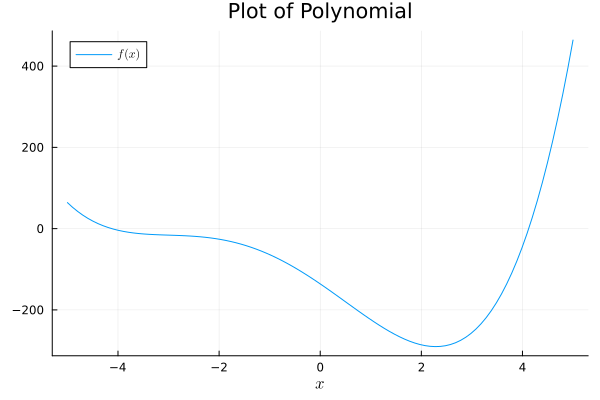

In [6]:
using Plots
f(x) = x^4 + 5*x^3 - 9*x^2 - 85*x - 136

xvals = LinRange(-5, 5, 100)
plot(xvals, f.(xvals), label = L"f(x)", xlabel = L"x", title = "Plot of Polynomial")

Notice that there are two real roots (one near $-4$ and one near $4$) for this quartic (degree $4$) polynomial. This means we should expect, beyond finding the two real roots, that we can find a complex root with Muller's method (we only need to find one; the other is the complex conjugate).

Recall that the point of Muller's method is that it is a generalization of the Secant method that is capable of finding complex roots. In particular, we use three points (instead of two) to construct an approximating parabola (instead of a line), and then our new guess is given by the root of the approximation (choosing the root of the parabola based on the sign of the linear coefficient).

All this is to set up the geometric intuition. If we choose our three initial points near $-4$, we should expect to converge to the real root that is near there (similar for $+4$). How can we find the complex roots? Consider choosing the three initial points between, say, $-2$ and $0$. There, $f(x)$ is concave down and negative, so we should expect that the approximating parabola is concave down and always negative (i.e., there are no real roots of the approximating parabola). Then, we will have in the first iterate a complex approximation to the root. Following that iteration scheme will likely produce the complex root we desire to the desired accuracy (again, the last of the four roots will be given by the conjugate).

We'll do one iteration for each of these three cases. To approximate the root near $4$, choose $p_{0} = 2$, $p_{1} = 3$, $p_{2} = 4$. Then, the approximating parabola is given by $\newline \newline$
$$
P(x) = a(x - p_{2})^{2} + b(x - p_{2}) + c,
\newline
$$
where $\newline \newline$
$$
\begin{align*}
    c &= f(p_{2}) \\
    b &= \frac{(p_{0} - p_{2})^{2}[f(p_{1}) - f(p_{2})] - (p_{1} - p_{2})^{2}[f(p_{0}) - f(p_{2})]}{(p_{0} - p_{2})(p_{1} - p_{2})(p_{0} - p_{1})} \\
    a &= \frac{(p_{1} - p_{2})[f(p_{0}) - f(p_{2})] - (p_{0} - p_{2})[f(p_{1}) - f(p_{2})]}{(p_{0} - p_{2})(p_{1} - p_{2})(p_{0} - p_{1})}
\end{align*}
\newline
$$
From this we get $c = -44$, $b = 303$, and $a = 91$. This means the approximating parabola is $\newline \newline$
$$
P(x) = 91(x - 4)^2 + 303(x - 4) - 44.
\newline
$$
We can plot it and the three nodes that we are interpolating (about to learn about interpolation in the next section):

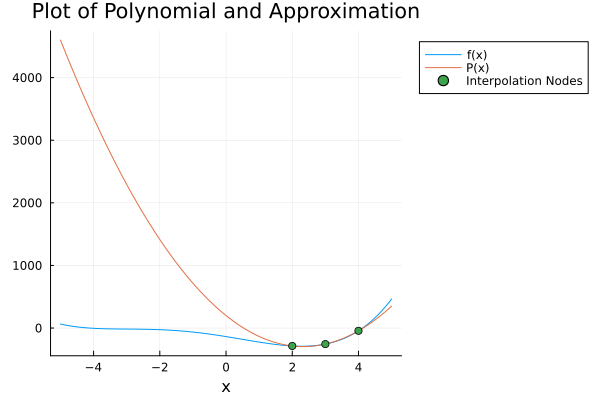

In [7]:
plot(xvals, f.(xvals), label = "f(x)", xlabel = "x", title = "Plot of Polynomial and Approximation", legend = :outertopright)

P(x) = 91*(x - 4)^2 + 303*(x - 4) - 44
plot!(xvals, P.(xvals), label = "P(x)")
interp_nodes = [(2, f(2)), (3, f(3)), (4, f(4))]
scatter!(interp_nodes, label = "Interpolation Nodes")

We can find $p_{3}$ with the formula $\newline \newline$
$$
p_{3} = p_{2} - \frac{2c}{b + \text{sgn}(b)\sqrt{b^{2} - 4ac}} \approx 	4.13938006889.
\newline
$$

To approach the root near $-4$, pick, for example, the initial points $p_{0} = -2$, $p_{1} = -3$, $p_{2} = -4$. Then, we follow the same process and would obtain $c = -4$, $b = -13$, and $a = 1$, giving $\newline \newline$
$$
p_{3} \approx 	-4.30073525437.
$$

Finally, to get a complex root approximation, take the initial guesses $p_{0} = -2$, $p_{1} = -1$, and $p_{2} = 0$. Then, we get $c = -136$, $b = -89$ and $a = -17$. We can plot this:

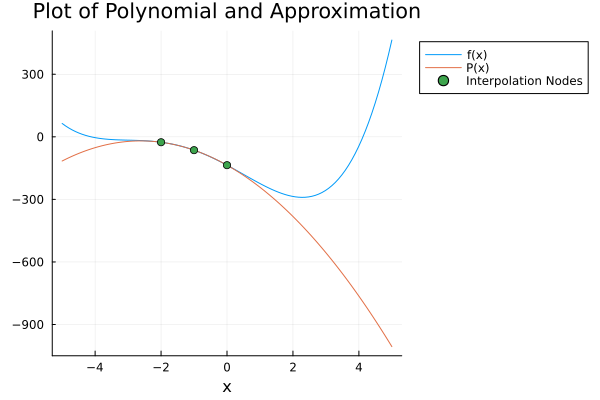

In [8]:
plot(xvals, f.(xvals), label = "f(x)", xlabel = "x", title = "Plot of Polynomial and Approximation", legend = :outertopright)

P(x) = -17*(x - 0)^2 - 89*(x - 0) - 136
plot!(xvals, P.(xvals), label = "P(x)")
interp_nodes = [(-2, f(-2)), (-1, f(-1)), (0, f(0))]
scatter!(interp_nodes, label = "Interpolation Nodes")

Notice that this has no real roots, and the complex root we obtain is given by $\newline \newline$
$$
\begin{align*}
p_{3} &= p_{2} - \frac{2c}{b + \text{sgn}(b)\sqrt{b^{2} - 4ac}} \\
&= 0 - \frac{-272}{-89 - \sqrt{7921 - 9248}} \\
&= -2.61765 + 1.07141i.
\end{align*}
\newline
$$
We can check what the actual complex conjugate roots are to see if we are close:

In [9]:
using PolynomialRoots
roots([-136, -85, -9, 5, 1])

LoadError: ArgumentError: Package PolynomialRoots not found in current path.
- Run `import Pkg; Pkg.add("PolynomialRoots")` to install the PolynomialRoots package.

Indeed, we find that we have a decent first approximation to one of the complex roots (the one with positive imaginary component). If we were to continue iterating, we would get a more accurate solution.

Finally, to wrap up the discussion on Chapter 2, I want to show that there is a package called `Roots.jl` that has many of the functions we've used built in, so that you can use them without having to code them yourself (code reuse is very good!). Suppose I want to solve $x^{2} = e^{x}$. I can find the root(s) of $f(x) = e^{x} - x^{2}$:

In [27]:
using Roots
f(x) = exp(x) - x^2
p = Roots.bisection(f, -1., 0.) # Need the prefix of Roots. because function is not exported in source

-0.7034674224983916

Clearly, this is much easier to do from our end, because the code for bisection method is, in some sense, "hidden" behind the Roots package. We don't need to actually code the method ourselves, just importing Roots and calling the function from the package gives us the same result in 3 lines instead of ~30 lines. If you work on a project in the future outside of this class, check to see if somebody else wrote code you can use before you try to implement something yourself! It will save you time and potentially a headache as well!

A note here is that Roots.jl is not the _only_ way to compute roots with Julia. Another option would be using, say, Optim.jl (common nonlinear optimization toolbox) and minimizing the absolute value of $f$, i.e., solving the minimization problem $\newline \newline$
$$
p = \text{argmin}|f(x)|.
\newline
$$
The point here is simply that there are many ways to accomplish a specific goal, so you can choose whatever you are most comfortable with.

## Chapter 3.1: Lagrange Interpolants

Now we've wrapped up Chapter 2 and said some words about real world use of those concepts, so we'll move into Chapter 3. The chapter is about interpolation and polynomial approximation. The essence of "why we care" is that there are many scenarios in the real world where we have a discrete dataset of inputs and outputs and we would like to get a continuous (i.e., not discrete) function mapping that agrees completely on our dataset, and that we can then use to extract information not in the dataset (i.e., try to get the output of the mapping given an input we haven't seen before). This could be, for example, a dataset where we are given a city's population for a collection of years, and we would like to approximate the city's population at a year where there was no census taken (see problem 3.1.19).

The reason why we choose polynomials to approximate with is really a combination of two things: the Weierstrass Approximation Theorem, and the fact that calculus on polynomials is easy. The Weierstrass Approximation Theorem guarantees us that for well-behaved (i.e., continuous on a closed interval) functions, there exist sequences of polynomials that approximate the function to an arbitrary degree (within an arbitrary tolerance over the interval). Of course, the ease of calculus is self-explanatory; if we want to compute the integral of a "hard" function over some interval $[a, b]$, we can approximate it with a polynomial interpolant and take the integral of the interpolant (which can be done using linearity of integrals and power rule). This provides us with a way to integrate functions that don't have nice anti-derivatives (or any at all) as long as we can evaluate the function at a collection of nodes.

Now that some motivation has been given, let's look at a way to compute polynomials that agree with a function on a set of points, namely, the Lagrange interpolant. Given data $\newline \newline$
$$
\{(x_{0}, f(x_{0})), (x_{1}, f(x_{1})), \dots, (x_{n}, f(x_{n}))\},
\newline
$$
there is a unique (why?) polynomial of degree at most $n$ that passes through all of these points (i.e., agrees with the full dataset). Further, we can compute this polynomial with the formula $\newline \newline$
$$
P(x) = \sum_{k = 0}^{n}f(x_{k})L_{n,k}(x)
\newline
$$
where $\newline \newline$
$$
L_{n, k}(x) = \prod_{i = 0 \\ i \neq k}^{n}\frac{x - x_{i}}{x_{k} - x_{i}}.
\newline
$$
With a quick look at these formulas, you can see that $P(x_{j}) = f(x_{j})$, since $L_{n,k}(x_{j}) = 1$ if $x_{j} = x_{k}$, and $0$ otherwise. In a more compact notation, $\newline \newline$
$$
L_{n,k}(x_{j}) = \delta_{jk}.
\newline
$$
This is (more or less) a proof that the Lagrange interpolant actually agrees with our data (of course, if you wanted to prove it completely, more justification would be necessary). What this gives us is something to actualy compute with, so let's look at a problem to see it in action!

## Example: Problem 3.1.1(a)

For the given function $f(x)$, let $x_{0} = 0$, $x_{1} = 0.6$, and $x_{2} = 0.9$. Construct interpolation polynomials of degree at most one and at most two to approximate $f(0.45)$ and find the absolute error. $\newline \newline$
$$
f(x) = \cos(x)
\newline
$$

## Solution:

We first need to evaluate $f$ at the nodes to give ourselves the full dataset to work with. For the first degree interpolant, we will only need $f(x_{0})$ and $f(x_{1})$, but for the second degree interpolant we will also require $f(x_{2})$. We have $\newline \newline$
$$
\cos(x_{0}) = \cos(0) = 1, \\
\cos(x_{1}) = \cos(0.6) \approx 0.8253, \\
\cos(x_{2}) = \cos(0.9) \approx 0.6216.
\newline
$$
So, our dataset is $\{(0, 1), (0.6, 0.8253), (0.9, 0.6216)\}$. For the first order interpolant, we need $\newline \newline$
$$
P(x) = \sum_{k = 0}^{1}f(x_{k})L_{1, k}(x),
\newline
$$
where $\newline \newline$
$$
L_{1, k}(x) = \prod_{i = 0 \\ i \neq k}^{1}\frac{x - x_{i}}{x_{k} - x_{i}}.
\newline
$$
Let's get the first term of our sum for $P$. We need $L_{1, 0}$ for that: $\newline \newline$
$$
L_{1, 0}(x) = \prod_{i = 0 \\ i \neq 0}^{1}\frac{x - x_{i}}{x_{0} - x_{i}} = \frac{x - x_{1}}{x_{0} - x_{1}} = \frac{x - 0.6}{0 - 0.6} = -\frac{5}{3}(x - \frac{3}{5}).
\newline
$$
So, our first term of the sum for $P$ is this result times $f(x_{0})$, which is $1$. Now, we'll compute the second term by first computing $L_{1, 1}$: $\newline \newline$
$$
L_{1, 1}(x) = \prod_{i = 0 \\ i \neq 1}^{1}\frac{x - x_{i}}{x_{1} - x_{i}} = \frac{x - x_{0}}{x_{1} - x_{0}} = \frac{x - 0}{0.6 - 0} = \frac{5}{3}x.
\newline
$$
And, of course, our second term of the sum is going to be $f(x_{1}) \approx 0.8253$ times this result. Our end result for the linear interpolant is that we have $\newline \newline$
$$
P(x) = -\frac{5}{3}(x - \frac{3}{5}) + 0.8253(\frac{5}{3}x) = -0.2912x + 1.
\newline
$$
Let's visualize this to see how the interpolant looks:

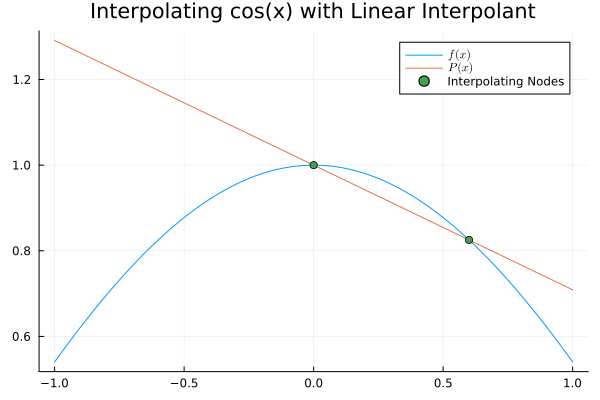

In [30]:
using Plots
using DataInterpolations
using LaTeXStrings

f(x) = cos(x)
x_vals = [0., 0.6]
y_vals = f.(x_vals)
p = LagrangeInterpolation(y_vals, x_vals, 1, extrapolate = true)

x_mesh = LinRange(-1, 1, 100)

plot(x_mesh, f.(x_mesh), label = L"$f(x)$", title = "Interpolating cos(x) with Linear Interpolant")
plot!(x_mesh, p.(x_mesh), label = L"$P(x)$")
scatter!([(0, 1), (0.6, 0.8253)], label = "Interpolating Nodes")

In [31]:
println("Approximation at 0.45: $(p(0.45))")
println("Absolute error: $(abs(p(0.45) - cos(0.45)))")

Approximation at 0.45: 0.8690017111822587
Absolute error: 0.031445391170418224


(Notice the use of DataInterpolations.jl and the `LagrangeInterpolations` function above, it saves some coding, in the spirit of the first part of today's notebook!)

Now, we want to compute the second degree interpolant (i.e., the quadratic interpolant). Unfortunately, we have to recompute the summands, since now we have the $L_{n, k}$ being of order 2 instead of order 1 (i.e., our Lagrange basis polynomials are now quadratic, rather than linear). We get $\newline \newline$
$$
P(x) = \sum_{k = 0}^{2}f(x_{k})L_{2, k}
\newline
$$
For the first summand, we have $\newline \newline$
$$
\begin{align*}
    f(x_{0})L_{2, 0}(x) = L_{2, 0}(x) &= \prod_{i = 0 \\ i \neq 0}^{2}\frac{x - x_{i}}{x_{0} - x_{i}} \\
    &= \frac{x - x_{1}}{x_{0} - x_{1}} \cdot \frac{x - x_{2}}{x_{0} - x_{2}} \\
    &= \frac{x - 0.6}{0 - 0.6} \cdot \frac{x - 0.9}{0 - 0.9} \\
    &= \frac{1}{0.54}(x^{2} - 1.5x + 0.54) \\
    &\approx 1.85x^{2} - 2.77x + 1.
\end{align*}
\newline
$$
For the second summand, we get $\newline \newline$
$$
\begin{align*}
    f(x_{1})L_{2, 1}(x) &= 0.8253L_{2, 1}(x) \\
    &= 0.8253\prod_{i = 0 \\ i \neq 1}^{2}\frac{x - x_{i}}{x_{1} - x_{i}} \\
    &= 0.8253 \cdot \frac{x - x_{0}}{x_{1} - x_{0}} \cdot \frac{x - x_{2}}{x_{1} - x_{2}} \\
    &= 0.8253\frac{x - 0}{0.6 - 0} \cdot \frac{x - 0.9}{0.6 - 0.9} \\
    &= -\frac{0.8253}{0.18}(x^{2} - 0.9x) \\
    &\approx -4.585x^{2} + 4.114x.
\end{align*}
\newline
$$
For the final summand, we obtain $\newline \newline$
$$
\begin{align*}
    f(x_{2})L_{2, 2}(x) &= 0.6216L_{2, 2}(x) \\
    &= 0.6216\prod_{i = 0 \\ i \neq 2}^{2}\frac{x - x_{i}}{x_{2} - x_{i}} \\
    &= 0.6216 \cdot \frac{x - x_{0}}{x_{2} - x_{0}} \cdot \frac{x - x_{1}}{x_{2} - x_{1}} \\
    &= 0.6216\frac{x - 0}{0.9 - 0} \cdot \frac{x - 0.6}{0.9 - 0.6} \\
    &= \frac{0.6216}{0.27}(x^{2} - 0.6x) \\
    &\approx 2.302x^{2} - 1.38x.
\end{align*}
\newline
$$
At last, we are in the right position to obtain $P(x)$. We add these results together to find $\newline \newline$
$$
\begin{align*}
    P(x) &= \sum_{k = 0}^{2}f(x_{k})L_{2, k}(x) \\
    &= (1.85x^{2} - 2.77x + 1) + (-4.585x^{2} + 4.114x) + (2.302x^{2} - 1.38x) \\
    &= -0.433x^{2} - 0.036x + 1. 
\end{align*}
\newline
$$
We can plot this again to see how it looks compared to the graph of $\cos(x)$:

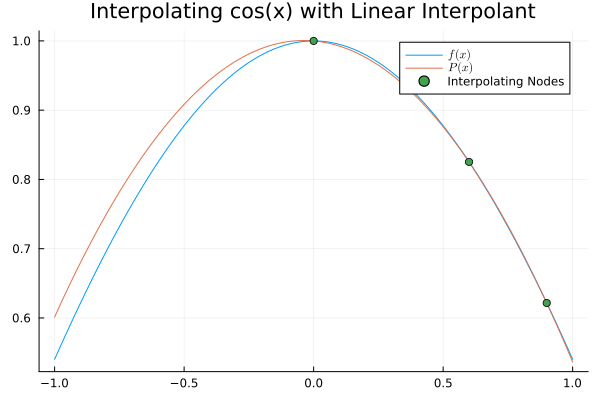

In [34]:
f(x) = cos(x)
x_vals = [0., 0.6, 0.9]
y_vals = f.(x_vals)
q = LagrangeInterpolation(y_vals, x_vals, 2, extrapolate = true)

x_mesh = LinRange(-1, 1, 100)

plot(x_mesh, f.(x_mesh), label = L"$f(x)$", title = "Interpolating cos(x) with Linear Interpolant")
plot!(x_mesh, q.(x_mesh), label = L"$P(x)$")
scatter!([(0, 1), (0.6, 0.8253), (0.9, 0.6216)], label = "Interpolating Nodes")

In [35]:
println("Approximation at 0.45: $(q(0.45))")
println("Absolute error: $(abs(q(0.45) - cos(0.45)))")

Approximation at 0.45: 0.8981000747057217
Absolute error: 0.0023470276469551576


## Example 2: Problem 3.1.3(a)

## Solution:

Recall that Theorem 3 says that given a set of $n + 1$ distinct nodes $\{x_{k}\}_{k = 0}^{n}$ and a function that is $n + 1$ times continuously differentiable all in an interval $[a, b]$, then there exists a $\xi$ between the leftmost and rightmost nodes so that $\newline \newline$
$$
f(x) = P(x) + \frac{f^{(n + 1)}(\xi)}{(n + 1)!}\prod_{k = 0}^{n}(x - x_{k}).
\newline
$$
(Notice the very similar looking form to the Taylor error!) From this, we get an error bound of (assuming the nodes are appropriately ordered, i.e., $x_{0} < x_{1} < \dots < x_{n}$) $\newline \newline$
$$
|f(x) - P(x)| \leq \max_{x \in [x_{0}, x_{n}]}\Big|\frac{f^{(n + 1)}(x)}{(n + 1)!}\prod_{k = 0}^{n}(x - x_{k})\Big|
\newline
$$
We will only do the analysis for the degree one interpolant; the second degree interpolant is similar (with a bit more arithmetic along the way). For the degree one interpolant, $n = 1$, so we need the second derivative of $f$, which is $-\cos(x)$. Maximizing the absolute value of this over $[0, 0.6]$, we get a bound of $1$. This tells us that our coefficient before the product has a bound of $\newline \newline$
$$
\Big|\frac{f^{(n + 1)}(x)}{(n + 1)!}\Big| \leq \frac{1}{2}.
\newline
$$
For the polynomial piece, we have the maximization problem $\newline \newline$
$$
\max_{[0, 0.6]}\Big|(x - 0)(x - 0.6)\Big| = \max_{[0, 0.6]}\Big|x^{2} - 0.6x\Big|.
\newline
$$
This can be done with the usual calculus techniques. The derivative of the polynomial is $q'(x) = 2x - 0.6$, so our critical point is $p = 0.3$. It is easy to check (i.e., first or second derivative test) that $p$ is a mimimum, and $q(p) = (0.3)^{2} - 0.6(0.3) = -0.09$. Of course, we must also check the value of the function at the endpoints, but by the definition of the function $f$, both of these values are zero. Hence, our bound on the product is $\newline \newline$
$$
\max_{[0, 0.9]}\Big|(x - 0)(x - 0.6)\Big| \leq |q(0.3)| = 0.09.
\newline
$$
This tells us that our overall bound on the error on $[0, 0.6]$ is $\newline \newline$
$$
|f(x) - P(x)| \leq \max_{[0, 0.6]}\Big|\frac{f''(x)}{2!}(x - 0)(x - 0.6)\Big| \leq \frac{1}{2} \cdot 0.09 = 0.045.
\newline
$$
We can check this bound with Julia's norm function (which requires LinearAlgebra):

In [36]:
f(x) = cos(x)
x_vals = [0., 0.6]
y_vals = f.(x_vals)
r = LagrangeInterpolation(y_vals, x_vals, 1)

x_mesh = LinRange(0, 0.6, 100)
error = abs.(f.(x_mesh) - r.(x_mesh))

println("Maximum error over the interval [0, 0.9]: $(norm(error, Inf))")

Maximum error over the interval [0, 0.9]: 0.04267766642069293
